Trabalho 1 de redes neurais:

Fazendo dowload e importando as bibliotecas que vamos utilizar nesse trabalho:

In [9]:
'''!pip install pandas matplotlib numpy seaborn
!pip install -U scikit-learn scikeras
!pip install scikit-learn==1.3.2 scikeras==0.12.0
!pip install tensorflow
!pip install tabulate'''


'!pip install pandas matplotlib numpy seaborn\n!pip install -U scikit-learn scikeras\n!pip install scikit-learn==1.3.2 scikeras==0.12.0\n!pip install tensorflow\n!pip install tabulate'

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from itertools import product
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Plotando os histogramas de todas as variáveis da nossa base de dados:

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


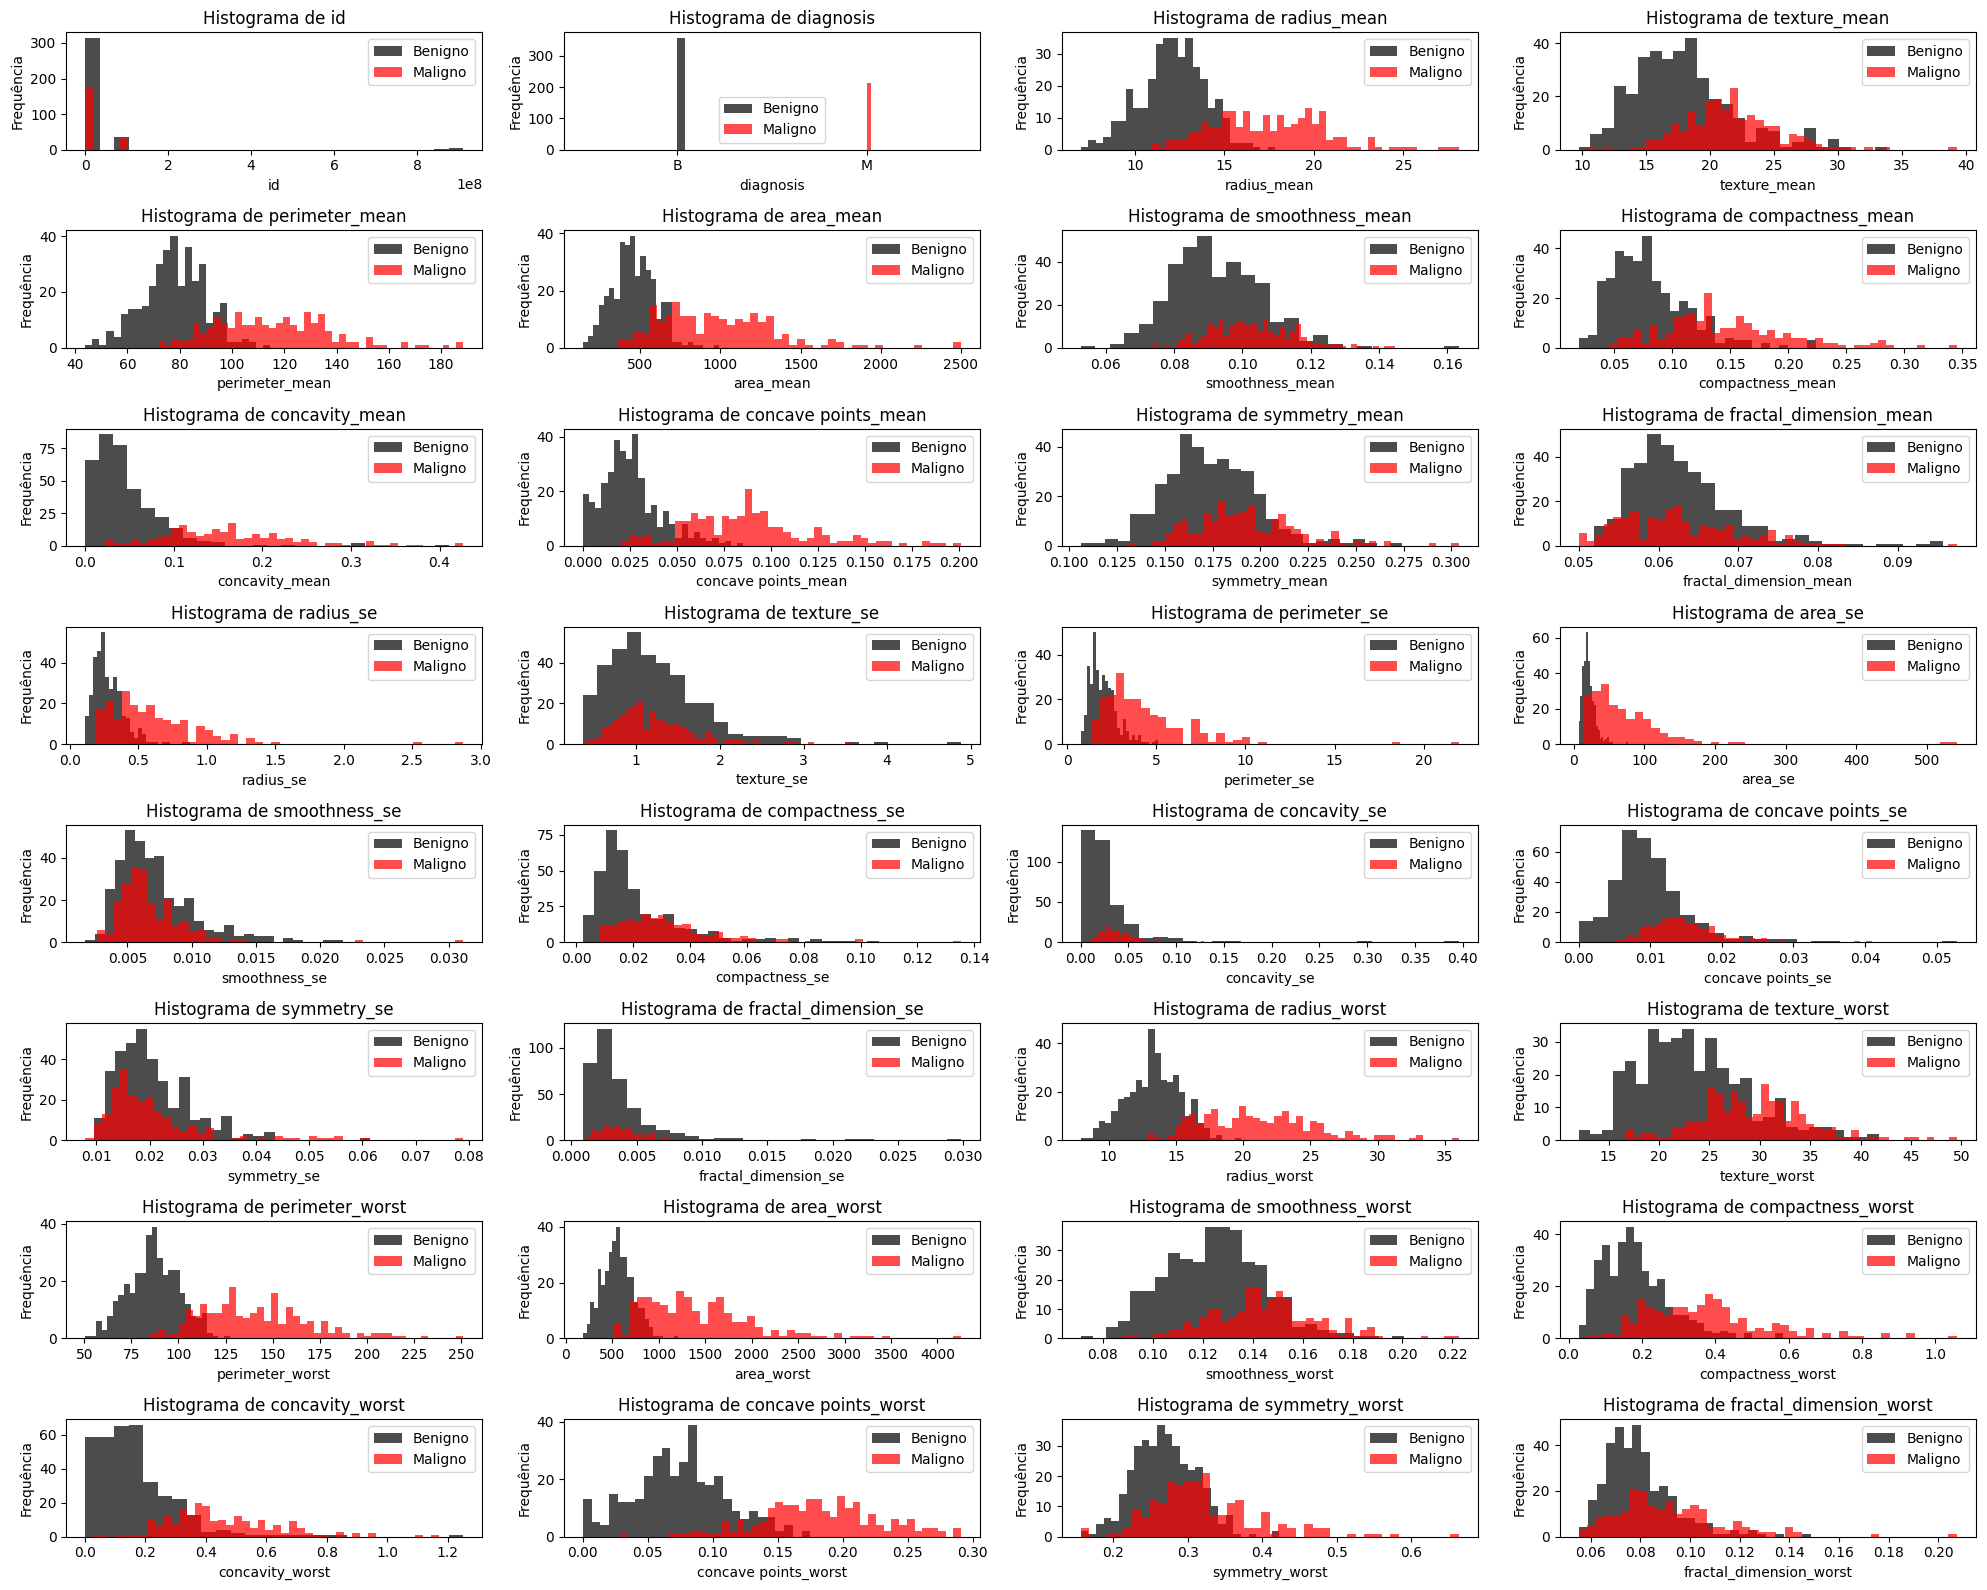

In [2]:
data = pd.read_csv('C:/Users/User/Desktop/trabalho RN/data.csv')
display(data.head())
benigno = data[data['diagnosis'] == 'B']
maligno = data[data['diagnosis'] == 'M']
fig, ax = plt.subplots(8,4, figsize=(20,16))
ax = ax.flatten()

c = 0
for c in range(32):

    if c <= len(data.columns):
        ax[c].hist(benigno[benigno.columns[c]], bins = 26, color = 'black', alpha = 0.7, label='Benigno')
        ax[c].hist(maligno[maligno.columns[c]], bins = 44, color = 'red', alpha = 0.7, label='Maligno')
        ax[c].set_title(f'Histograma de {data.columns[c]}')
        ax[c].set_xlabel(f'{data.columns[c]}')
        ax[c].set_ylabel('Frequência')
        ax[c].legend()
        c += 1
plt.tight_layout()
plt.show()
        

Fazendo os boxplots: 

C:\Users\User\AppData\Local\Temp\ipykernel_6560\812664814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=data.columns[c], data=data, palette=cores, ax=ax[c])
C:\Users\User\AppData\Local\Temp\ipykernel_6560\812664814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=data.columns[c], data=data, palette=cores, ax=ax[c])
C:\Users\User\AppData\Local\Temp\ipykernel_6560\812664814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=data.columns[c], data=data, palette=cores, ax=ax[c])
C:\User

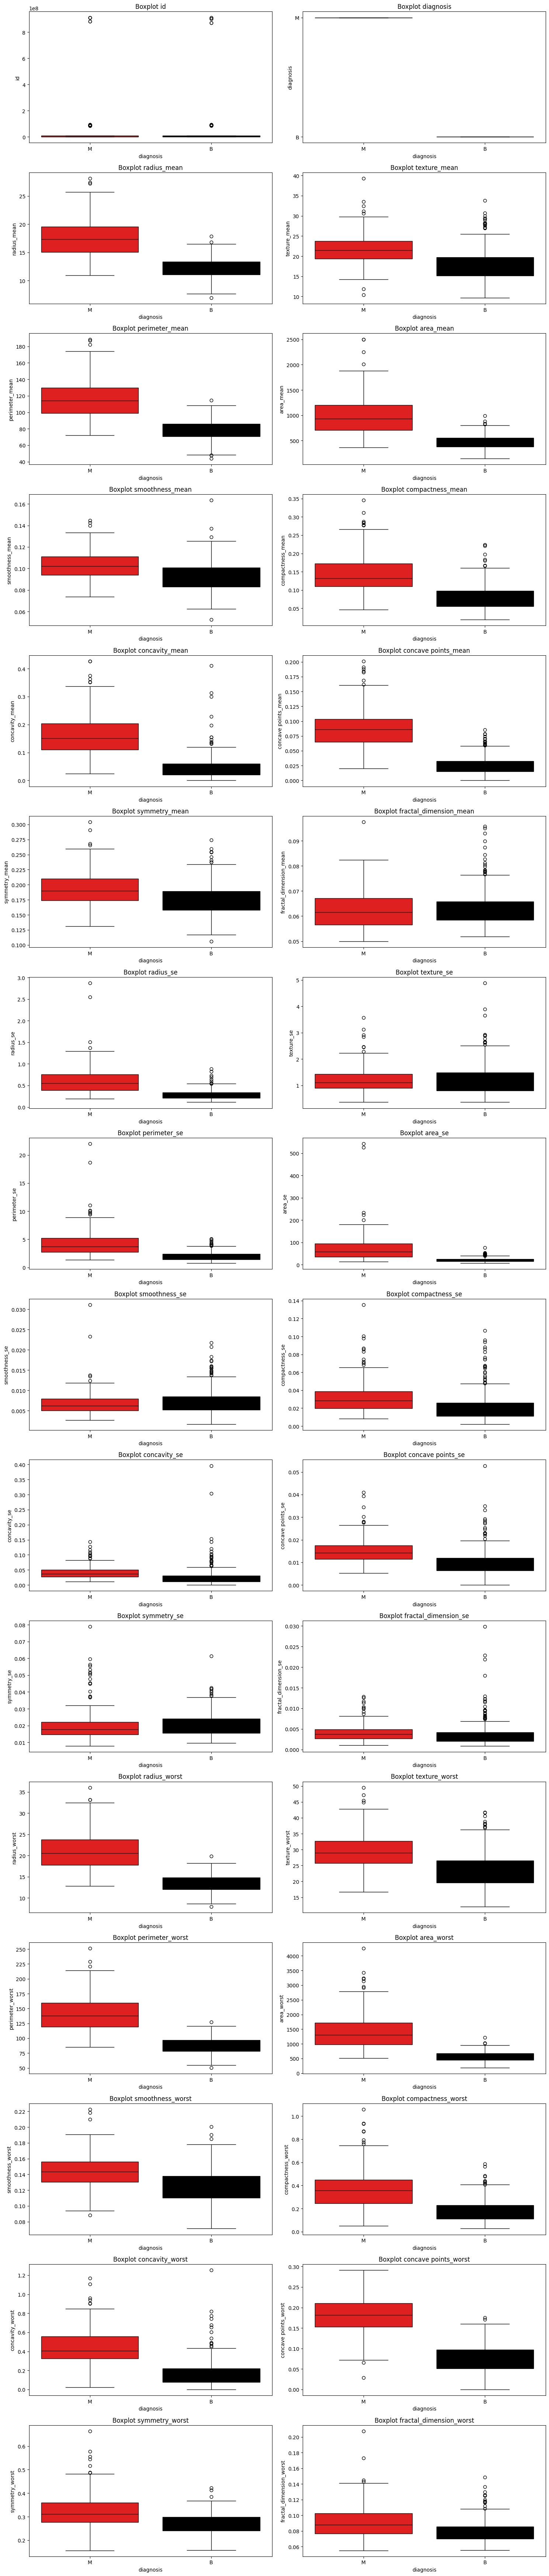

In [3]:
fig, ax = plt.subplots(16, 2, figsize=(15, 70))
ax = ax.flatten()
c = 0
cores = {'B': 'black', 'M': 'red'}
# Ajustar o loop para evitar acessar índices fora do limite
for c in range(32):
    sns.boxplot(x='diagnosis', y=data.columns[c], data=data, palette=cores, ax=ax[c])
    ax[c].set_title(f"Boxplot {data.columns[c]}")
    c += 1

plt.tight_layout()
plt.show()

Fazendo o Grid search para encontrar o melhor modelo para a nossa rede neural:

In [4]:
#Separar features e target:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
X = data[data.columns[2:32]].astype(np.float32)
y = data['diagnosis'].astype(np.int64)

#Separando teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Função construtora do modelo:
def build_model(hidden1, hidden2, activation1, activation2, activation3, learning_rate):
    model = Sequential([
        Dense(hidden1, activation=activation1, input_shape = (30,)),
        Dense(hidden2, activation=activation2),
        Dense(2, activation=activation3)
    ])
    model.compile(optimizer=Adam(learning_rate= learning_rate),
                  loss= 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

#Definindo hiperparâmetros a testar para nossa RN:
activation_vals1 = ['tanh', 'sigmoid', 'softplus', 'linear']
activation_vals2 = ['tanh', 'sigmoid', 'softplus']
activation_vals3 = ['tanh', 'sigmoid', 'softplus', 'softmax']
hidden1_vals = [32,16]
hidden2_vals = [8,4]
lr_vals = [0.0001, 0.001, 0.01, 0.003]

#lista para armazenar os resultados:
resultados = []
c = 0
#Loop para todas as combinações
for h1, h2, act1, act2, act3, lr in product(hidden1_vals, hidden2_vals, activation_vals1, activation_vals2, activation_vals3, lr_vals):
    print(f'Testando: hidden1 = {h1}, hidden2 = {h2}, activation1 = {act1},  activation2 = {act2}, activation3 = {act3}, lr = {lr}')
    c += 1
    print(f'Número de iterações: {c}')
    model = build_model(h1, h2, act1, act2, act3, lr)
    history = model.fit(X_train, y_train, epochs = 200, batch_size=32, verbose=1)
    y_pred = np.argmax(model.predict(X_test), axis = 1)
    acc = accuracy_score(y_test, y_pred)
    resultados.append(((h1, h2, act1, act2, act3, lr), acc))

#Melhor combinação:
melhor_combinacao = max(resultados, key = lambda x: x[1])
print('\n Melhor combinação: ', melhor_combinacao[0])
print('\n Acurácia no teste: ', melhor_combinacao[1])

#Avaliar melhor modelo final:
h1, h2, act1, act2, act3, lr = melhor_combinacao[0]
modelo_final = build_model(h1, h2, act1, act2, act3, lr)
modelo_final.fit(X_train, y_train, epochs = 200, batch_size = 32, verbose = 1)
y_pred_final = np.argmax(modelo_final.predict(X_test), axis = 1)
print('\n\nRelatório final:')
print('\n Melhor combinação: ', melhor_combinacao[0])
print('\n Acurácia no teste: ', melhor_combinacao[1])
print(classification_report(y_test, y_pred_final))

Testando: hidden1 = 32, hidden2 = 8, activation1 = tanh,  activation2 = tanh, activation3 = tanh, lr = 0.0001
Número de iterações: 1
Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 9.6501 - accuracy: 0.3714
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 9.6150 - accuracy: 0.3714
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 9.5749 - accuracy: 0.3714
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 9.5265 - accuracy: 0.3714
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 9.4667 - accuracy: 0.3714
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 9.3905 - accuracy: 0.3714
Epoch 7/200
15/15 [==============================] - 0s 193us/step - loss: 9.2861 - accuracy: 0.3714
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 9.1368 - accuracy: 0.3714
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 

KeyboardInterrupt: 

Retornando o melhor modelo:

In [ ]:
print('\n Melhor combinação: ', melhor_combinacao[0])
print('\n Acurácia no teste: ', melhor_combinacao[1])
print(melhor_combinacao)

Testando o melhor modelo encontrado pelo grid search e gráfico do loss por época:

Epoch 1/200


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 0s 11ms/step - loss: 13.7415 - accuracy: 0.4615 - val_loss: 0.2466 - val_accuracy: 0.8947
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 3.2121 - accuracy: 0.6505 - val_loss: 1.7184 - val_accuracy: 0.5526
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0201 - accuracy: 0.8000 - val_loss: 0.3491 - val_accuracy: 0.8860
Epoch 4/200
 1/15 [=>............................] - ETA: 0s - loss: 0.6853 - accuracy: 0.6875

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8637 - val_loss: 0.1735 - val_accuracy: 0.9561
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8879 - val_loss: 0.1736 - val_accuracy: 0.9474
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8989 - val_loss: 0.1486 - val_accuracy: 0.9474
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8901 - val_loss: 0.2118 - val_accuracy: 0.9386
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.9055 - val_loss: 0.2124 - val_accuracy: 0.9474
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8989 - val_loss: 0.1543 - val_accuracy: 0.9474
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8989 - val_loss: 0.1897 - val_accuracy: 0.9386
Epoch 11/200
15/15 [====

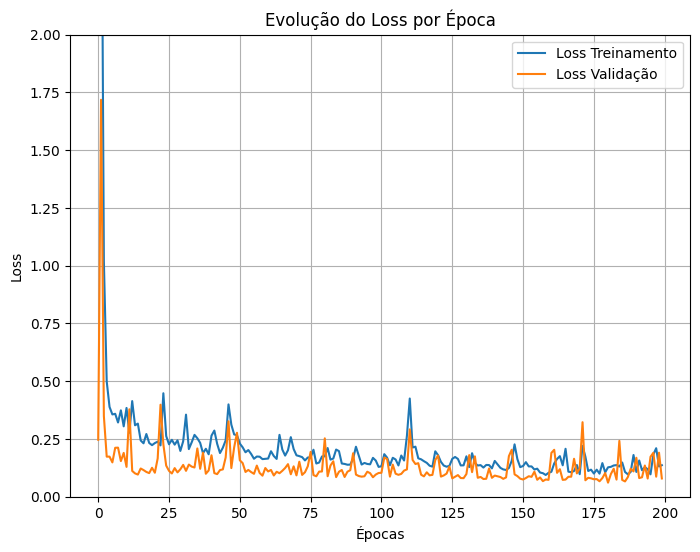

In [56]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

X = data[data.columns[2:32]].astype(np.float32)
y = data['diagnosis'].astype(np.int64)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = Sequential([
    Dense(32, input_shape = (X_train.shape[1],), activation = 'softplus'), 
    Dense(8, activation='softplus'),
    Dense(2, activation = 'softmax')])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy :.4f}')
y_pred = np.argmax(model.predict(X_test), axis = 1)
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.legend()
plt.grid(True)
plt.show()

Acurácia e Loss do melhor modelo:

In [58]:
print(f'Acurácia: {accuracy}. Loss: {loss}')

Acurácia: 0.9824561476707458. Loss: 0.07903001457452774


Plot do gráfico da acurácia:

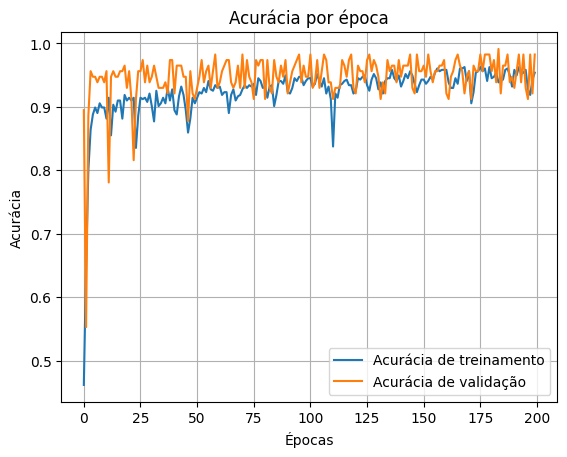

In [59]:
plt.plot(history.history['accuracy'], label = 'Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por época')
plt.legend()
plt.grid(True)
plt.show()

Resumo do modelo:

In [16]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                992       
                                                                 
 dense_19 (Dense)            (None, 8)                 264       
                                                                 
 dense_20 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


Plot das matrizes de confusão e correlação:

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


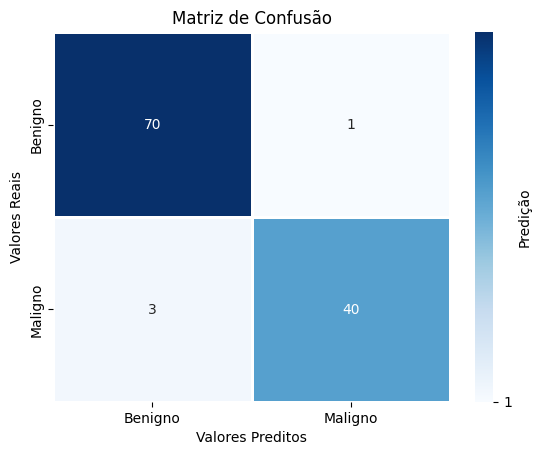

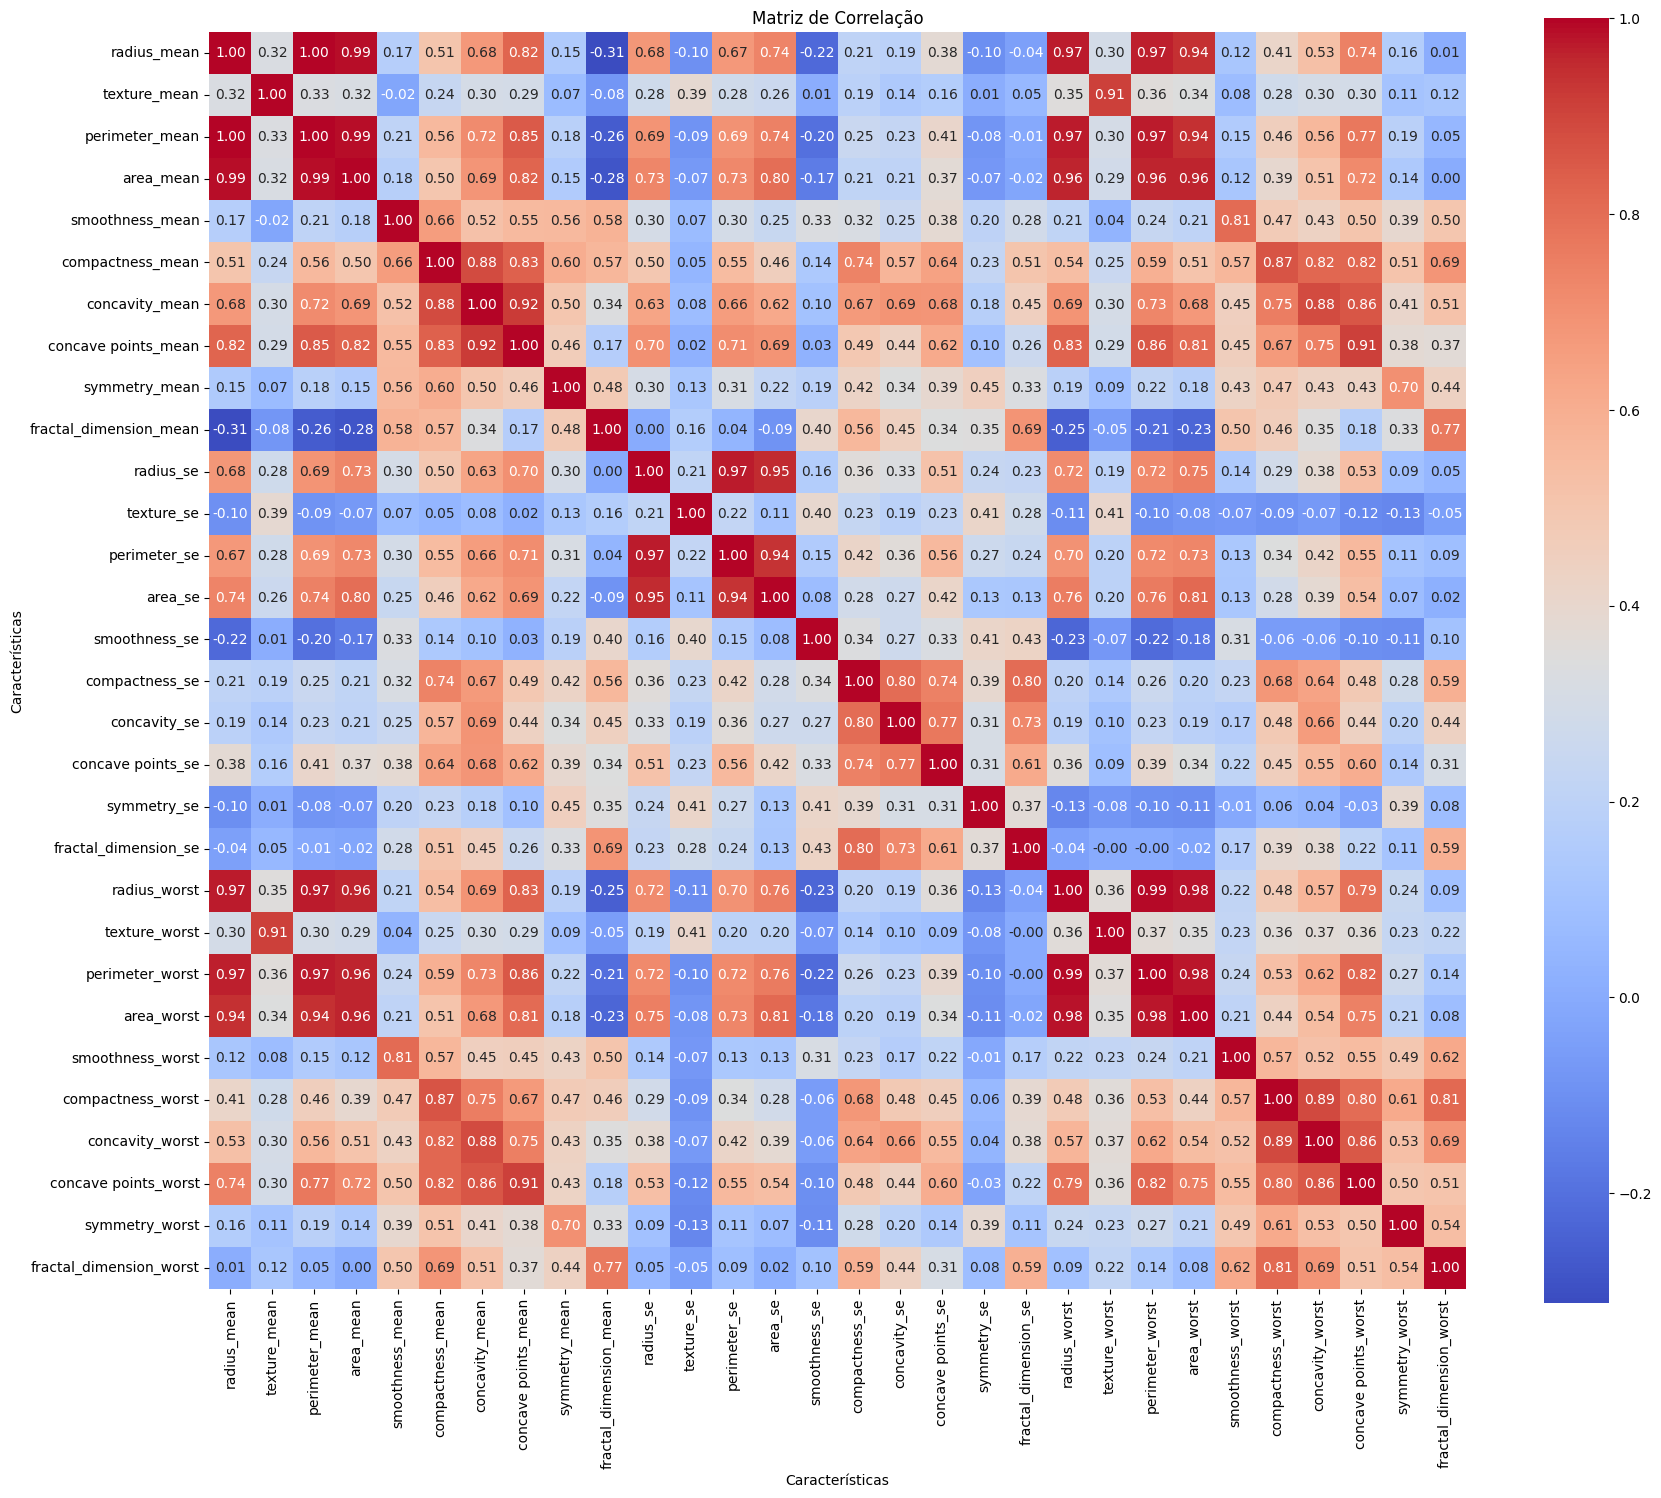

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


clf = LogisticRegression(random_state=0).fit(X_train,y_train)
pred_clf = clf.predict(X_test)


cf_matrix = confusion_matrix(y_test, pred_clf)
cf_matrix
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidth=1, fmt='d',
            cbar_kws={'ticks': [0, 1], 'label': 'Predição'},
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

df_corr = data.corr()
df_corr
df_corr = df_corr.drop(['id', 'diagnosis'], axis=1)
df_corr = df_corr.drop(['Unnamed: 32'], axis=1)

df_corr = df_corr.drop(['id', 'diagnosis'], axis=0)
df_corr = df_corr.drop(['Unnamed: 32'], axis=0)


fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm");
plt.title('Matriz de Correlação')
plt.xlabel('Características')
plt.ylabel('Características')
plt.tight_layout()

Implementação da validação cruzada k-fold:


========= Rodando GridSearchCV com k_fold = 2 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.7849621299945899

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



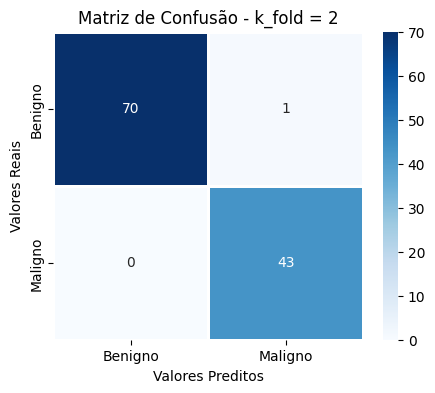

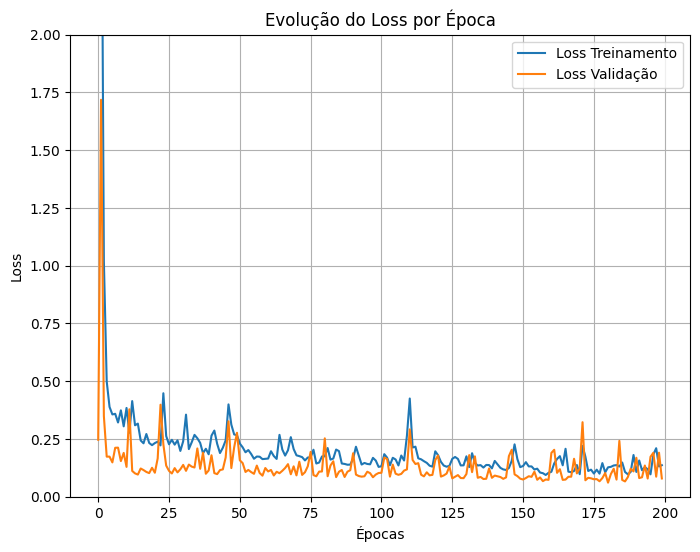

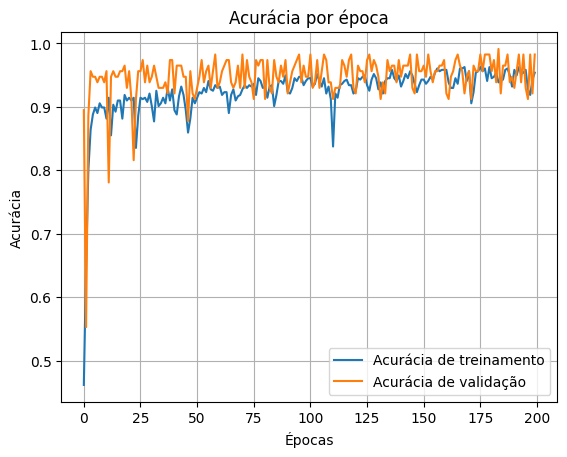


========= Rodando GridSearchCV com k_fold = 3 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.9494161728825374

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



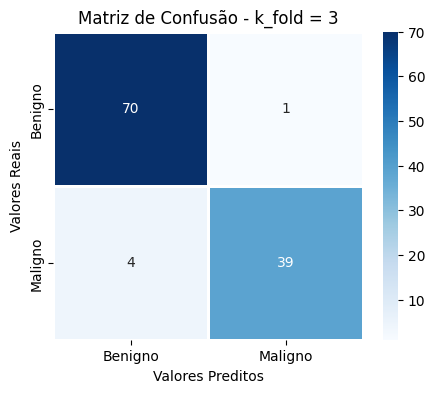

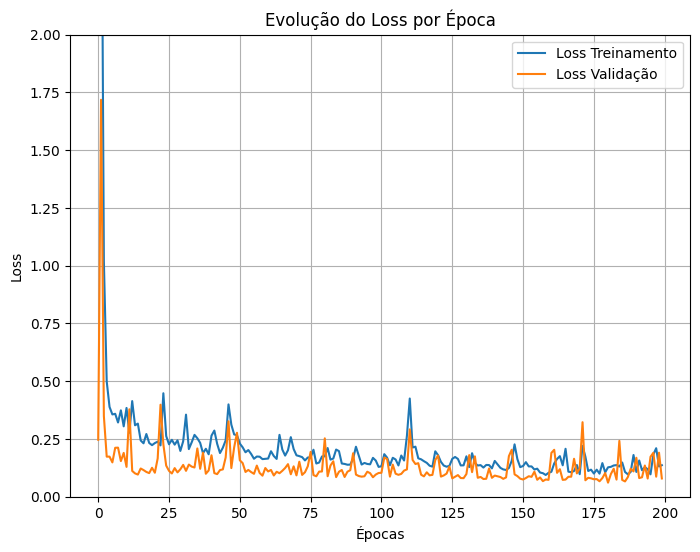

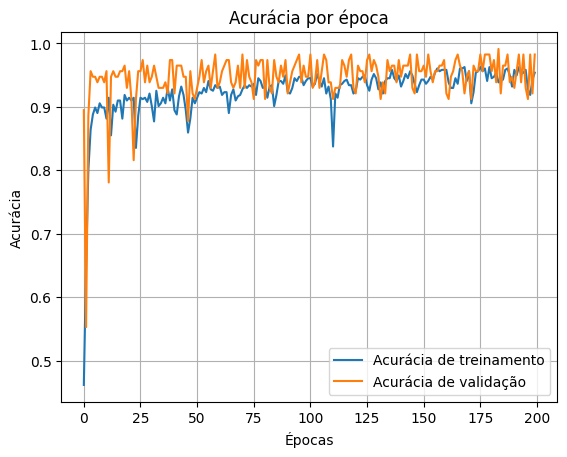


========= Rodando GridSearchCV com k_fold = 4 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.8639380530973452

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

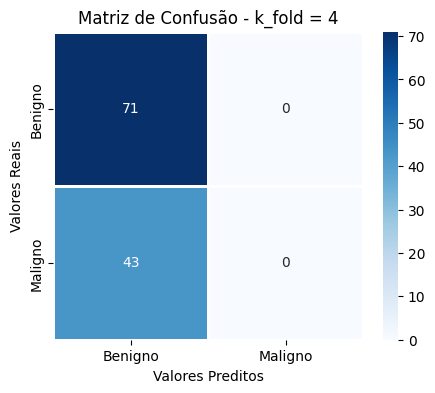

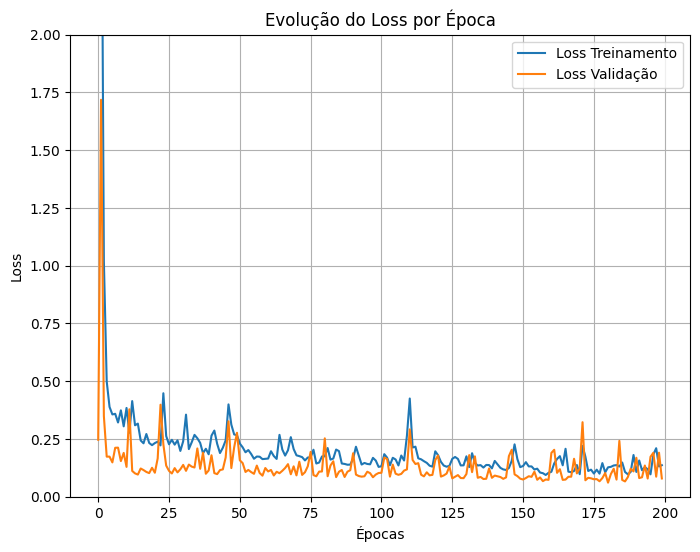

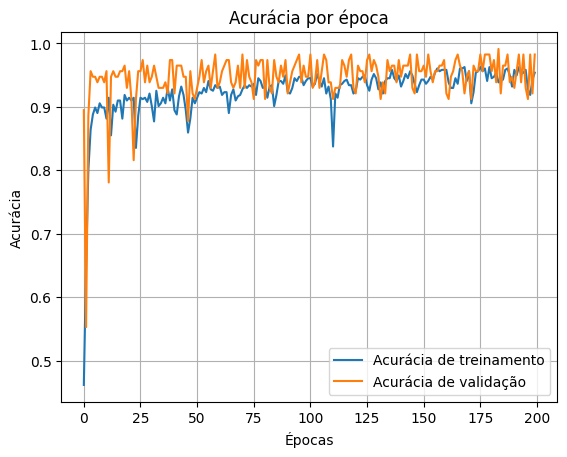


========= Rodando GridSearchCV com k_fold = 5 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.8923076923076924

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



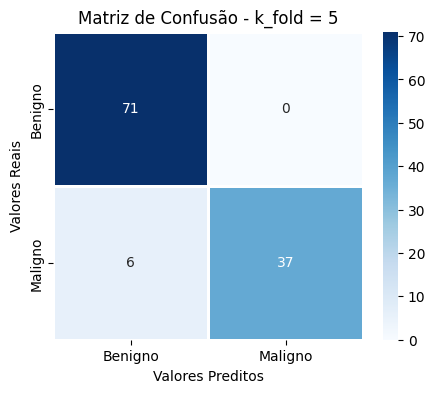

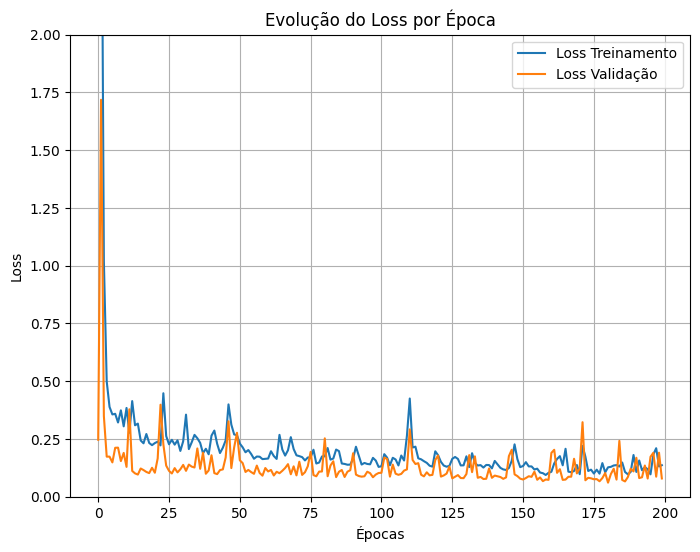

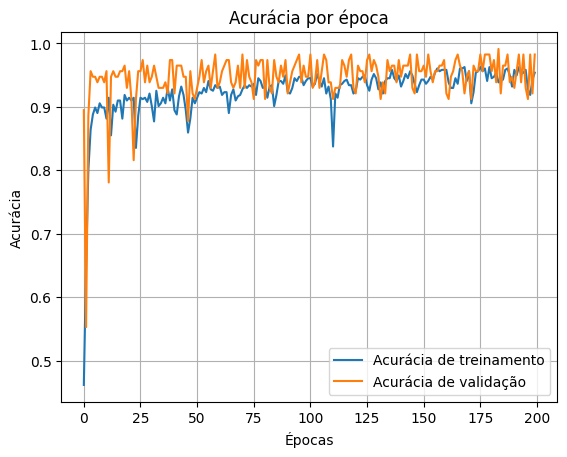


========= Rodando GridSearchCV com k_fold = 6 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.7908479532163742

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



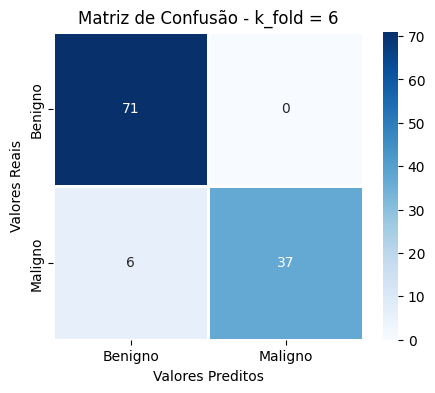

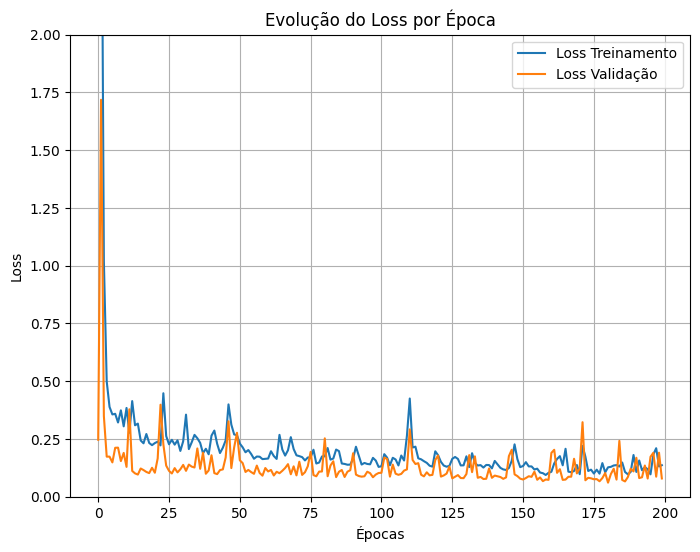

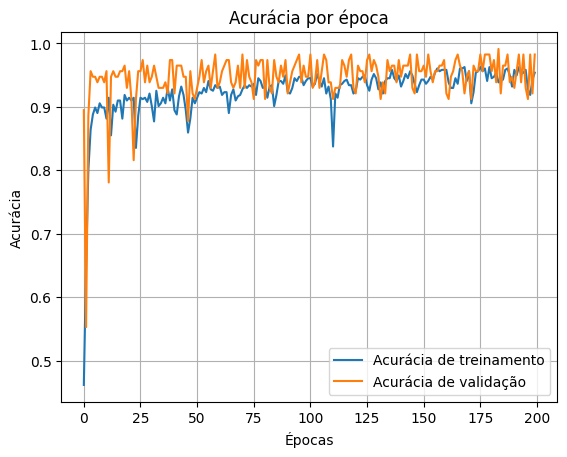


========= Rodando GridSearchCV com k_fold = 7 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.9054945054945056

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



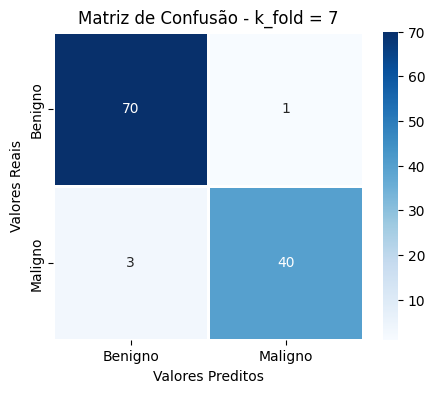

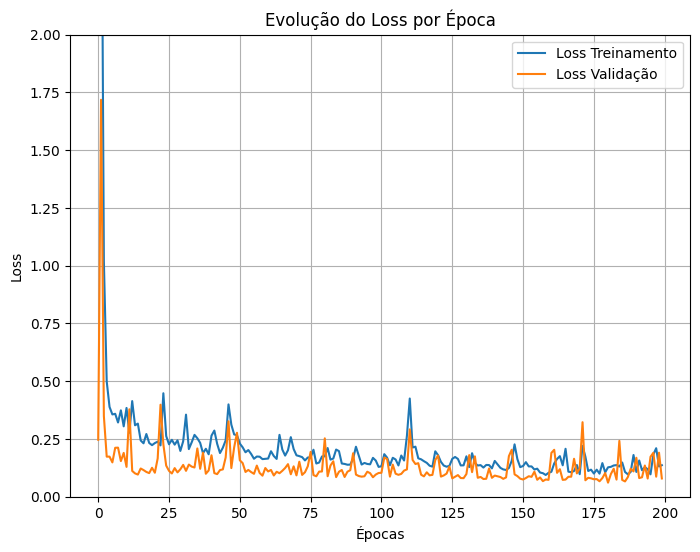

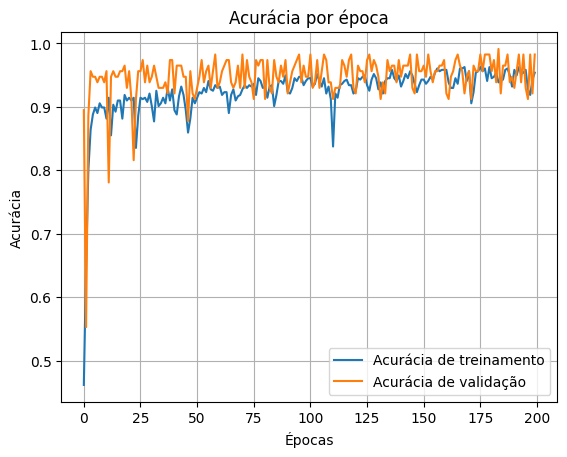


========= Rodando GridSearchCV com k_fold = 8 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.8682252506265664

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

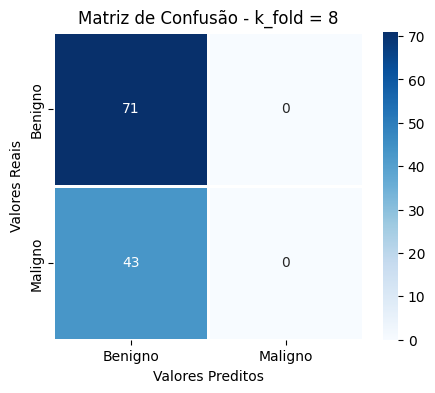

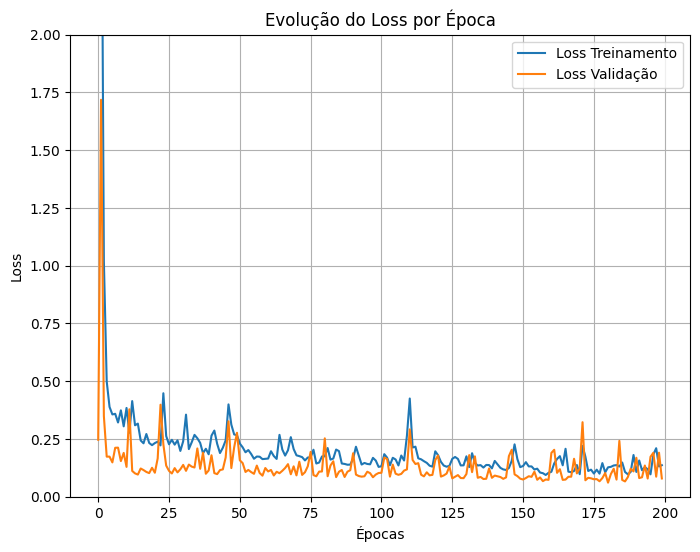

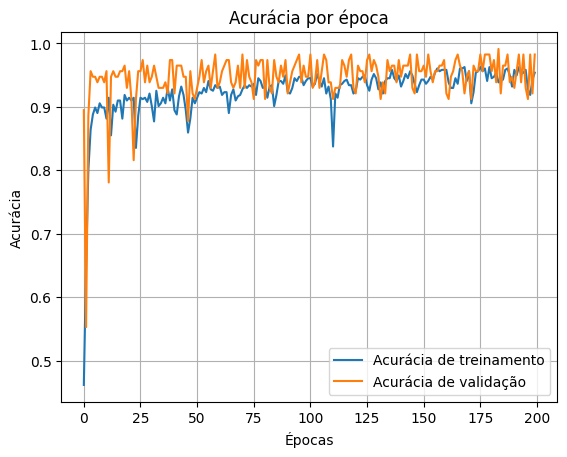


========= Rodando GridSearchCV com k_fold = 9 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.8767320261437909

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.79      0.88        43

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



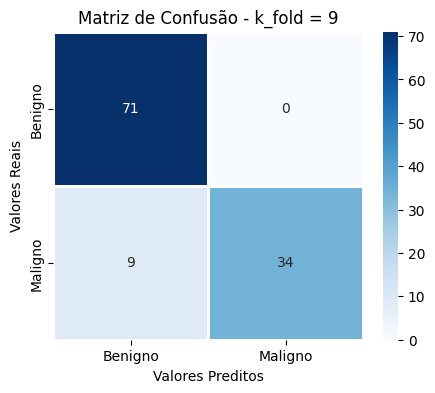

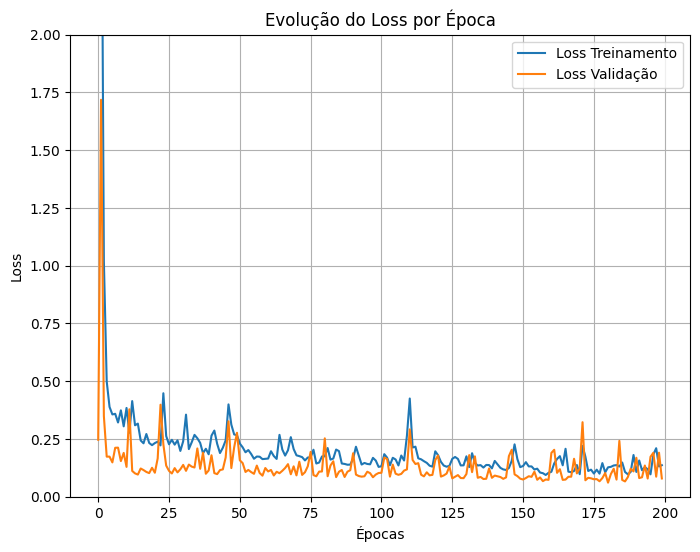

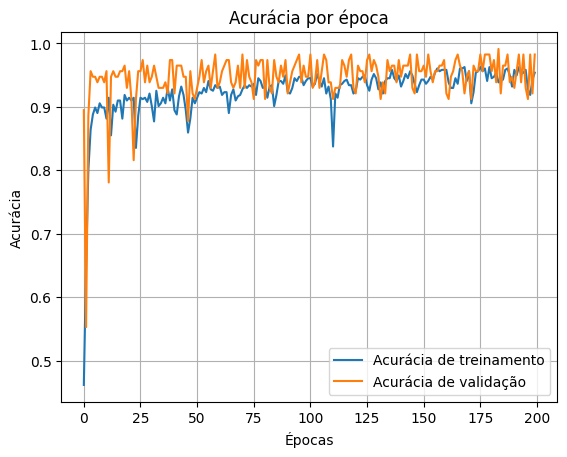


========= Rodando GridSearchCV com k_fold = 10 =========
Melhor combinação: {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.8567632850241547

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

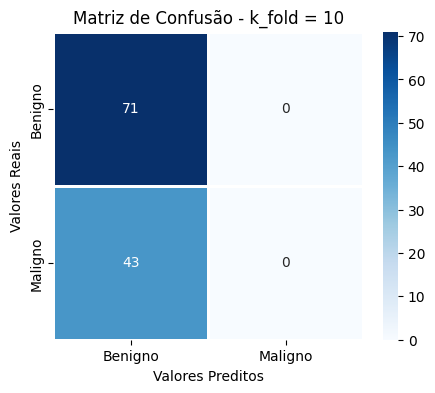

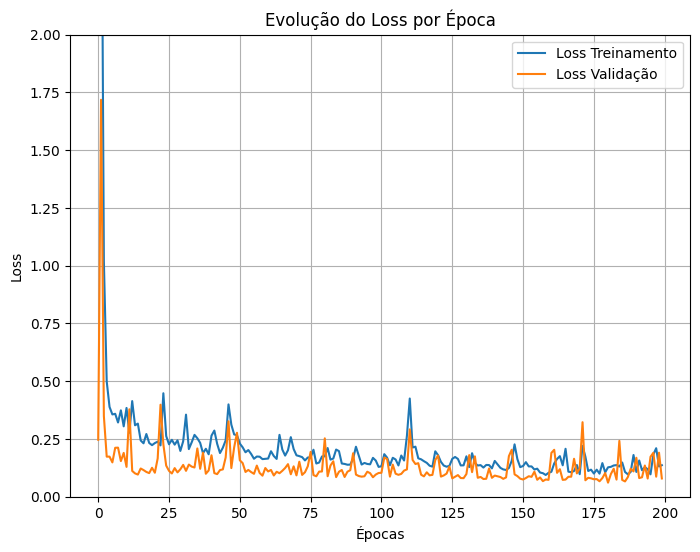

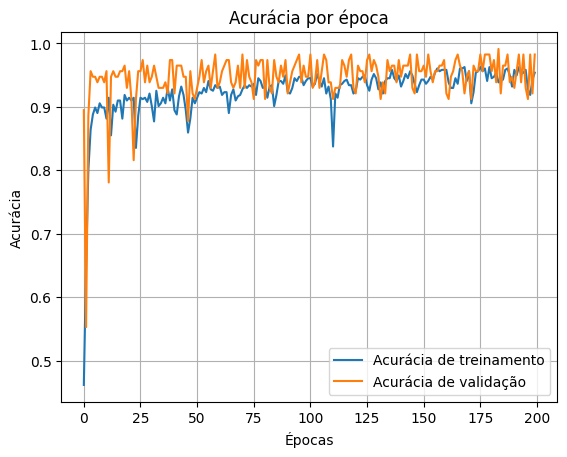

In [ ]:
for k in range(2, 11):
    print(f'\n========= Rodando GridSearchCV com k_fold = {k} =========')

    def build_model(hidden1, hidden2, activation1, activation2, activation3, learning_rate):
        model = Sequential([
      Dense(hidden1,activation=activation1, input_shape=(X_train.shape[1],)),
      Dense(hidden2,activation=activation2),
      Dense(2, activation=activation3)
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
        return model
    
    clf = KerasClassifier(
        model=build_model,
        epochs=500,
        batch_size=32,
        verbose=0
    )
    param_grid = {
    'model__hidden1': [32],
    'model__hidden2': [8],
    'model__activation1': ['softplus'],
    'model__activation2': ['softplus'],
    'model__activation3': ['softmax'],
    'model__learning_rate': [0.01]
}

    grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=k,scoring='accuracy',verbose=0)
    grid_result = grid.fit(X_train, y_train)

    print('Melhor combinação:', grid_result.best_params_)
    print('Melhor acurácia média:', grid_result.best_score_)

    # Avaliação no conjunto de teste
    y_pred = grid.predict(X_test)
    print('\nRelatório de classificação:')
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d', linewidth=1,
                xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.title(f'Matriz de Confusão - k_fold = {k}')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Valores Reais')
    plt.show()

    #Gráfico do Loss por época:
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Loss Treinamento')
    plt.plot(history.history['val_loss'], label='Loss Validação')
    plt.title('Evolução do Loss por Época')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.ylim(0,2)
    plt.legend()
    plt.grid(True)
    plt.show()

    #Gráfico da acurácia:
    plt.plot(history.history['accuracy'], label = 'Acurácia de treinamento')
    plt.plot(history.history['val_accuracy'], label = 'Acurácia de validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Acurácia por época')
    plt.legend()
    plt.grid(True)
    plt.show()

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Melhor combinação:  {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia:  0.8196135265700484
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



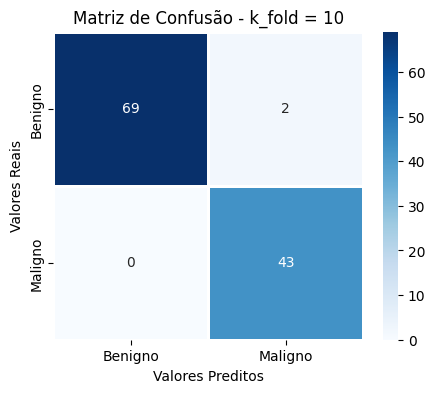

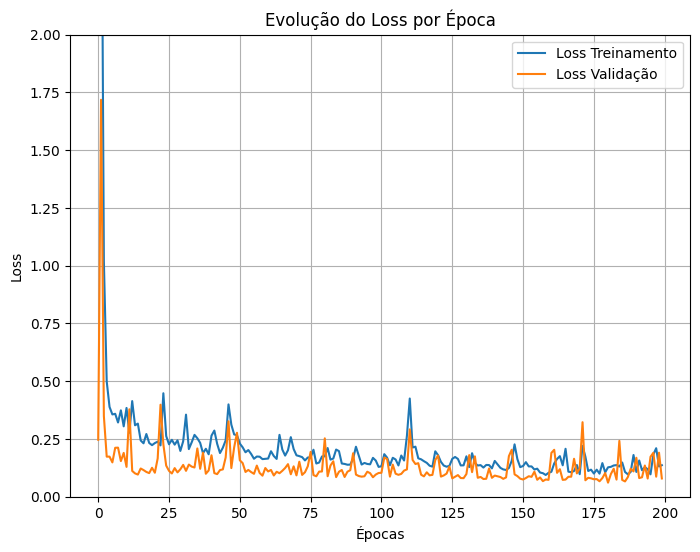

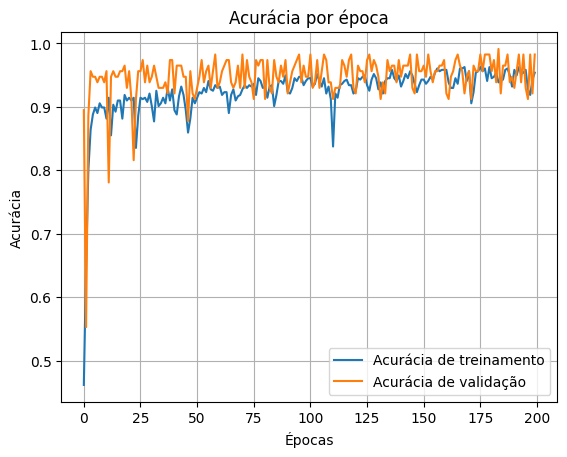

In [72]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
X = data[data.columns[2:32]].astype(np.float32)
y = data['diagnosis'].astype(np.int64)

k_fold = 10 #Vamos fazer testes com o k_fold = 2 até o k_fold = 10

#Dividir treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Função construtora do modelo:
def build_model(hidden1, hidden2, activation1, activation2, activation3, learning_rate):
  model = Sequential([
      Dense(hidden1,activation=activation1, input_shape=(X_train.shape[1],)),
      Dense(hidden2,activation=activation2),
      Dense(2, activation=activation3)
  ])
  model.compile(optimizer=Adam(learning_rate = learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model


#Criar o classificador:
clf = KerasClassifier(
    model = build_model,
    epochs = 200,
    batch_size = 32,
    verbose = 0
)

#Definir os hiperparâmetros:
param_grid = {
    'model__hidden1': [32],
    'model__hidden2': [8],
    'model__activation1': ['softplus'],
    'model__activation2': ['softplus'],
    'model__activation3': ['softmax'],
    'model__learning_rate': [0.01]
}
#Aplicar o GridSearchCV
grid = GridSearchCV(clf, param_grid = param_grid, cv = k_fold, scoring = 'accuracy', verbose = 1)
grid_result = grid.fit(X_train, y_train)

#Melhor combinação:
print('Melhor combinação: ', grid_result.best_params_)
print('Melhor acurácia: ', grid_result.best_score_)

#Avaliar no conjunto de teste:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d', linewidth=1,
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title(f'Matriz de Confusão - k_fold = {k_fold}')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

#Gráfico do Loss por época:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.legend()
plt.grid(True)
plt.show()

#Gráfico da acurácia:
plt.plot(history.history['accuracy'], label = 'Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por época')
plt.legend()
plt.grid(True)
plt.show()

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Melhor combinação:  {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia:  0.9515977443609023
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



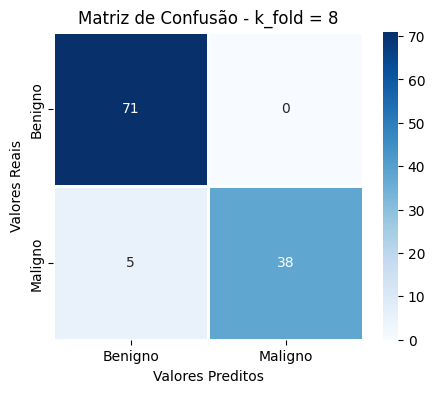

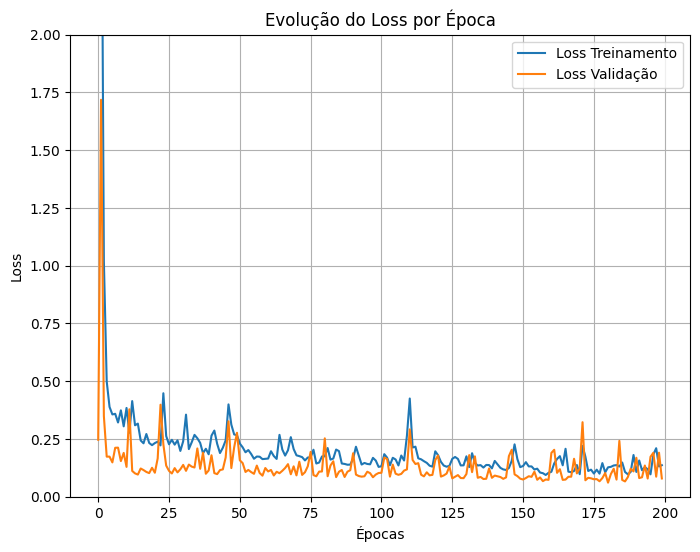

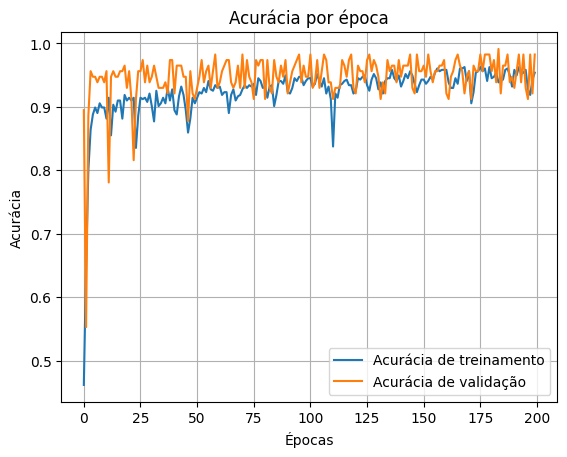

In [70]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
X = data[data.columns[2:32]].astype(np.float32)
y = data['diagnosis'].astype(np.int64)

k_fold = 8 #Vamos fazer testes com o k_fold = 2 até o k_fold = 10

#Dividir treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Função construtora do modelo:
def build_model(hidden1, hidden2, activation1, activation2, activation3, learning_rate):
  model = Sequential([
      Dense(hidden1,activation=activation1, input_shape=(X_train.shape[1],)),
      Dense(hidden2,activation=activation2),
      Dense(2, activation=activation3)
  ])
  model.compile(optimizer=Adam(learning_rate = learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model


#Criar o classificador:
clf = KerasClassifier(
    model = build_model,
    epochs = 200,
    batch_size = 32,
    verbose = 0
)

#Definir os hiperparâmetros:
param_grid = {
    'model__hidden1': [32],
    'model__hidden2': [8],
    'model__activation1': ['softplus'],
    'model__activation2': ['softplus'],
    'model__activation3': ['softmax'],
    'model__learning_rate': [0.01]
}
#Aplicar o GridSearchCV
grid = GridSearchCV(clf, param_grid = param_grid, cv = k_fold, scoring = 'accuracy', verbose = 1)
grid_result = grid.fit(X_train, y_train)

#Melhor combinação:
print('Melhor combinação: ', grid_result.best_params_)
print('Melhor acurácia: ', grid_result.best_score_)

#Avaliar no conjunto de teste:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d', linewidth=1,
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title(f'Matriz de Confusão - k_fold = {k_fold}')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

#Gráfico do Loss por época:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.legend()
plt.grid(True)
plt.show()

#Gráfico da acurácia:
plt.plot(history.history['accuracy'], label = 'Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por época')
plt.legend()
plt.grid(True)
plt.show()

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Melhor combinação:  {'model__activation1': 'softplus', 'model__activation2': 'softplus', 'model__activation3': 'softmax', 'model__hidden1': 32, 'model__hidden2': 8, 'model__learning_rate': 0.01}
Melhor acurácia:  0.9449813693525849
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



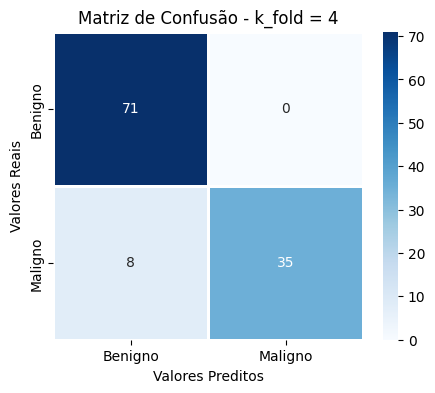

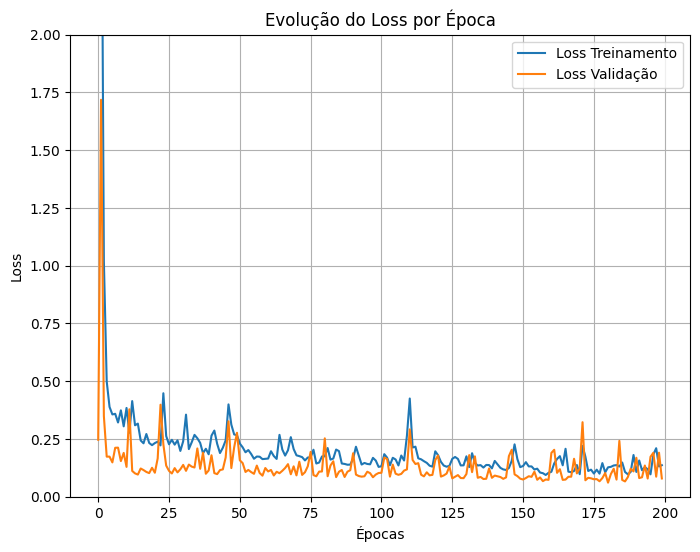

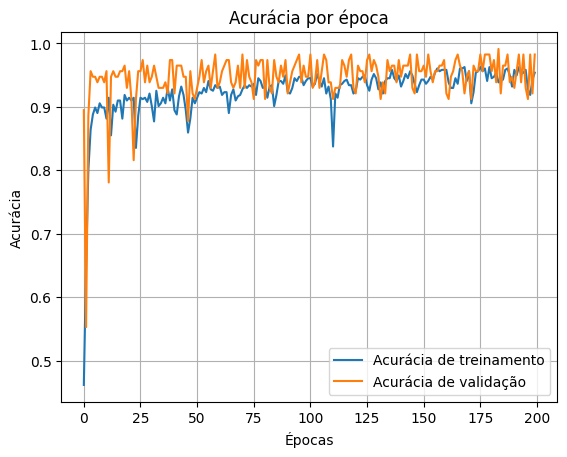

In [71]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
X = data[data.columns[2:32]].astype(np.float32)
y = data['diagnosis'].astype(np.int64)

k_fold = 4 #Vamos fazer testes com o k_fold = 2 até o k_fold = 10

#Dividir treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Função construtora do modelo:
def build_model(hidden1, hidden2, activation1, activation2, activation3, learning_rate):
  model = Sequential([
      Dense(hidden1,activation=activation1, input_shape=(X_train.shape[1],)),
      Dense(hidden2,activation=activation2),
      Dense(2, activation=activation3)
  ])
  model.compile(optimizer=Adam(learning_rate = learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model


#Criar o classificador:
clf = KerasClassifier(
    model = build_model,
    epochs = 200,
    batch_size = 32,
    verbose = 0
)

#Definir os hiperparâmetros:
param_grid = {
    'model__hidden1': [32],
    'model__hidden2': [8],
    'model__activation1': ['softplus'],
    'model__activation2': ['softplus'],
    'model__activation3': ['softmax'],
    'model__learning_rate': [0.01]
}
#Aplicar o GridSearchCV
grid = GridSearchCV(clf, param_grid = param_grid, cv = k_fold, scoring = 'accuracy', verbose = 1)
grid_result = grid.fit(X_train, y_train)

#Melhor combinação:
print('Melhor combinação: ', grid_result.best_params_)
print('Melhor acurácia: ', grid_result.best_score_)

#Avaliar no conjunto de teste:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d', linewidth=1,
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title(f'Matriz de Confusão - k_fold = {k_fold}')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

#Gráfico do Loss por época:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.legend()
plt.grid(True)
plt.show()

#Gráfico da acurácia:
plt.plot(history.history['accuracy'], label = 'Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por época')
plt.legend()
plt.grid(True)
plt.show()